# Constants

In [18]:
DATASET_PATH = '../data/breast_cancer.csv'

# Imports

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploration

## Load

In [20]:
df = pd.read_csv(DATASET_PATH)
df.shape

(512, 32)

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
1,2,B,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,NaN
2,3,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
3,4,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314
4,5,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,...,13.74,19.93,88.81,585.4,0.1483,NaN,0.22410,0.10560,0.3380,0.09584


## Info

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       512 non-null    int64  
 1   diagnosis                512 non-null    object 
 2   radius_mean              505 non-null    float64
 3   texture_mean             507 non-null    float64
 4   perimeter_mean           507 non-null    float64
 5   area_mean                508 non-null    float64
 6   smoothness_mean          506 non-null    float64
 7   compactness_mean         511 non-null    float64
 8   concavity_mean           502 non-null    float64
 9   concave points_mean      504 non-null    float64
 10  symmetry_mean            507 non-null    float64
 11  fractal_dimension_mean   509 non-null    float64
 12  radius_se                510 non-null    float64
 13  texture_se               505 non-null    float64
 14  perimeter_se             5

The dataset consists of 32 columns and 512 rows. One column (id) contains integer values and serves as a unique identifier. One column (diagnosis) is categorical, containing object-type data. The remaining 30 columns are numerical features represented as floating-point numbers (float64), including various measurements related to cell nuclei characteristics (e.g., radius_mean, texture_mean, smoothness_worst). Most columns have a few missing values.

## Duplicates

In [23]:
df.duplicated().any()

False

## Missing Values

In [24]:
df.isnull().sum()

id                          0
diagnosis                   0
radius_mean                 7
texture_mean                5
perimeter_mean              5
area_mean                   4
smoothness_mean             6
compactness_mean            1
concavity_mean             10
concave points_mean         8
symmetry_mean               5
fractal_dimension_mean      3
radius_se                   2
texture_se                  7
perimeter_se                1
area_se                     3
smoothness_se               6
compactness_se              4
concavity_se                2
concave points_se           4
symmetry_se                 5
fractal_dimension_se        5
radius_worst                5
texture_worst               2
perimeter_worst             7
area_worst                  7
smoothness_worst            5
compactness_worst           9
concavity_worst             4
concave points_worst       11
symmetry_worst              3
fractal_dimension_worst     7
dtype: int64

## Zeros

In [111]:
(df == 0).sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             12
concave points_mean        11
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               12
concave points_se          12
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            12
concave points_worst       12
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

# Visualize

## Class Imbalance

diagnosis
B    321
M    191
Name: count, dtype: int64


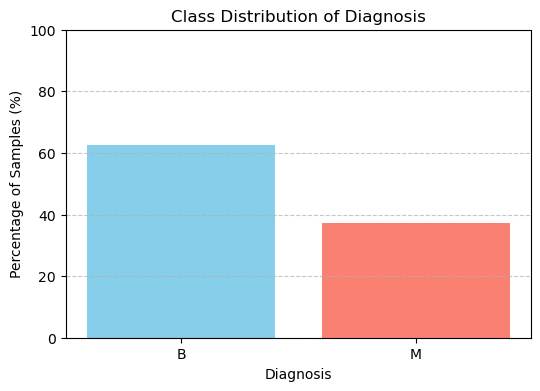

In [99]:
class_counts = df["diagnosis"].value_counts()
print(class_counts)

frequencies = df["diagnosis"].value_counts(normalize=True)

labels = class_counts.index
percentages = frequencies.values * 100

plt.figure(figsize=(6, 4))
plt.bar(labels, percentages, color=["skyblue", "salmon"])
plt.title("Class Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Percentage of Samples (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Approximately 63% of the samples are benign, while only 37% are malignant, hence the degree of imbalance can be considered **Mild**. The ratio of "B" labels to "M" labels is far from 1, although not severely skewed, this imbalance may influence the performance of certain classification algorithms by biasing them toward the majority class.

## Distributions

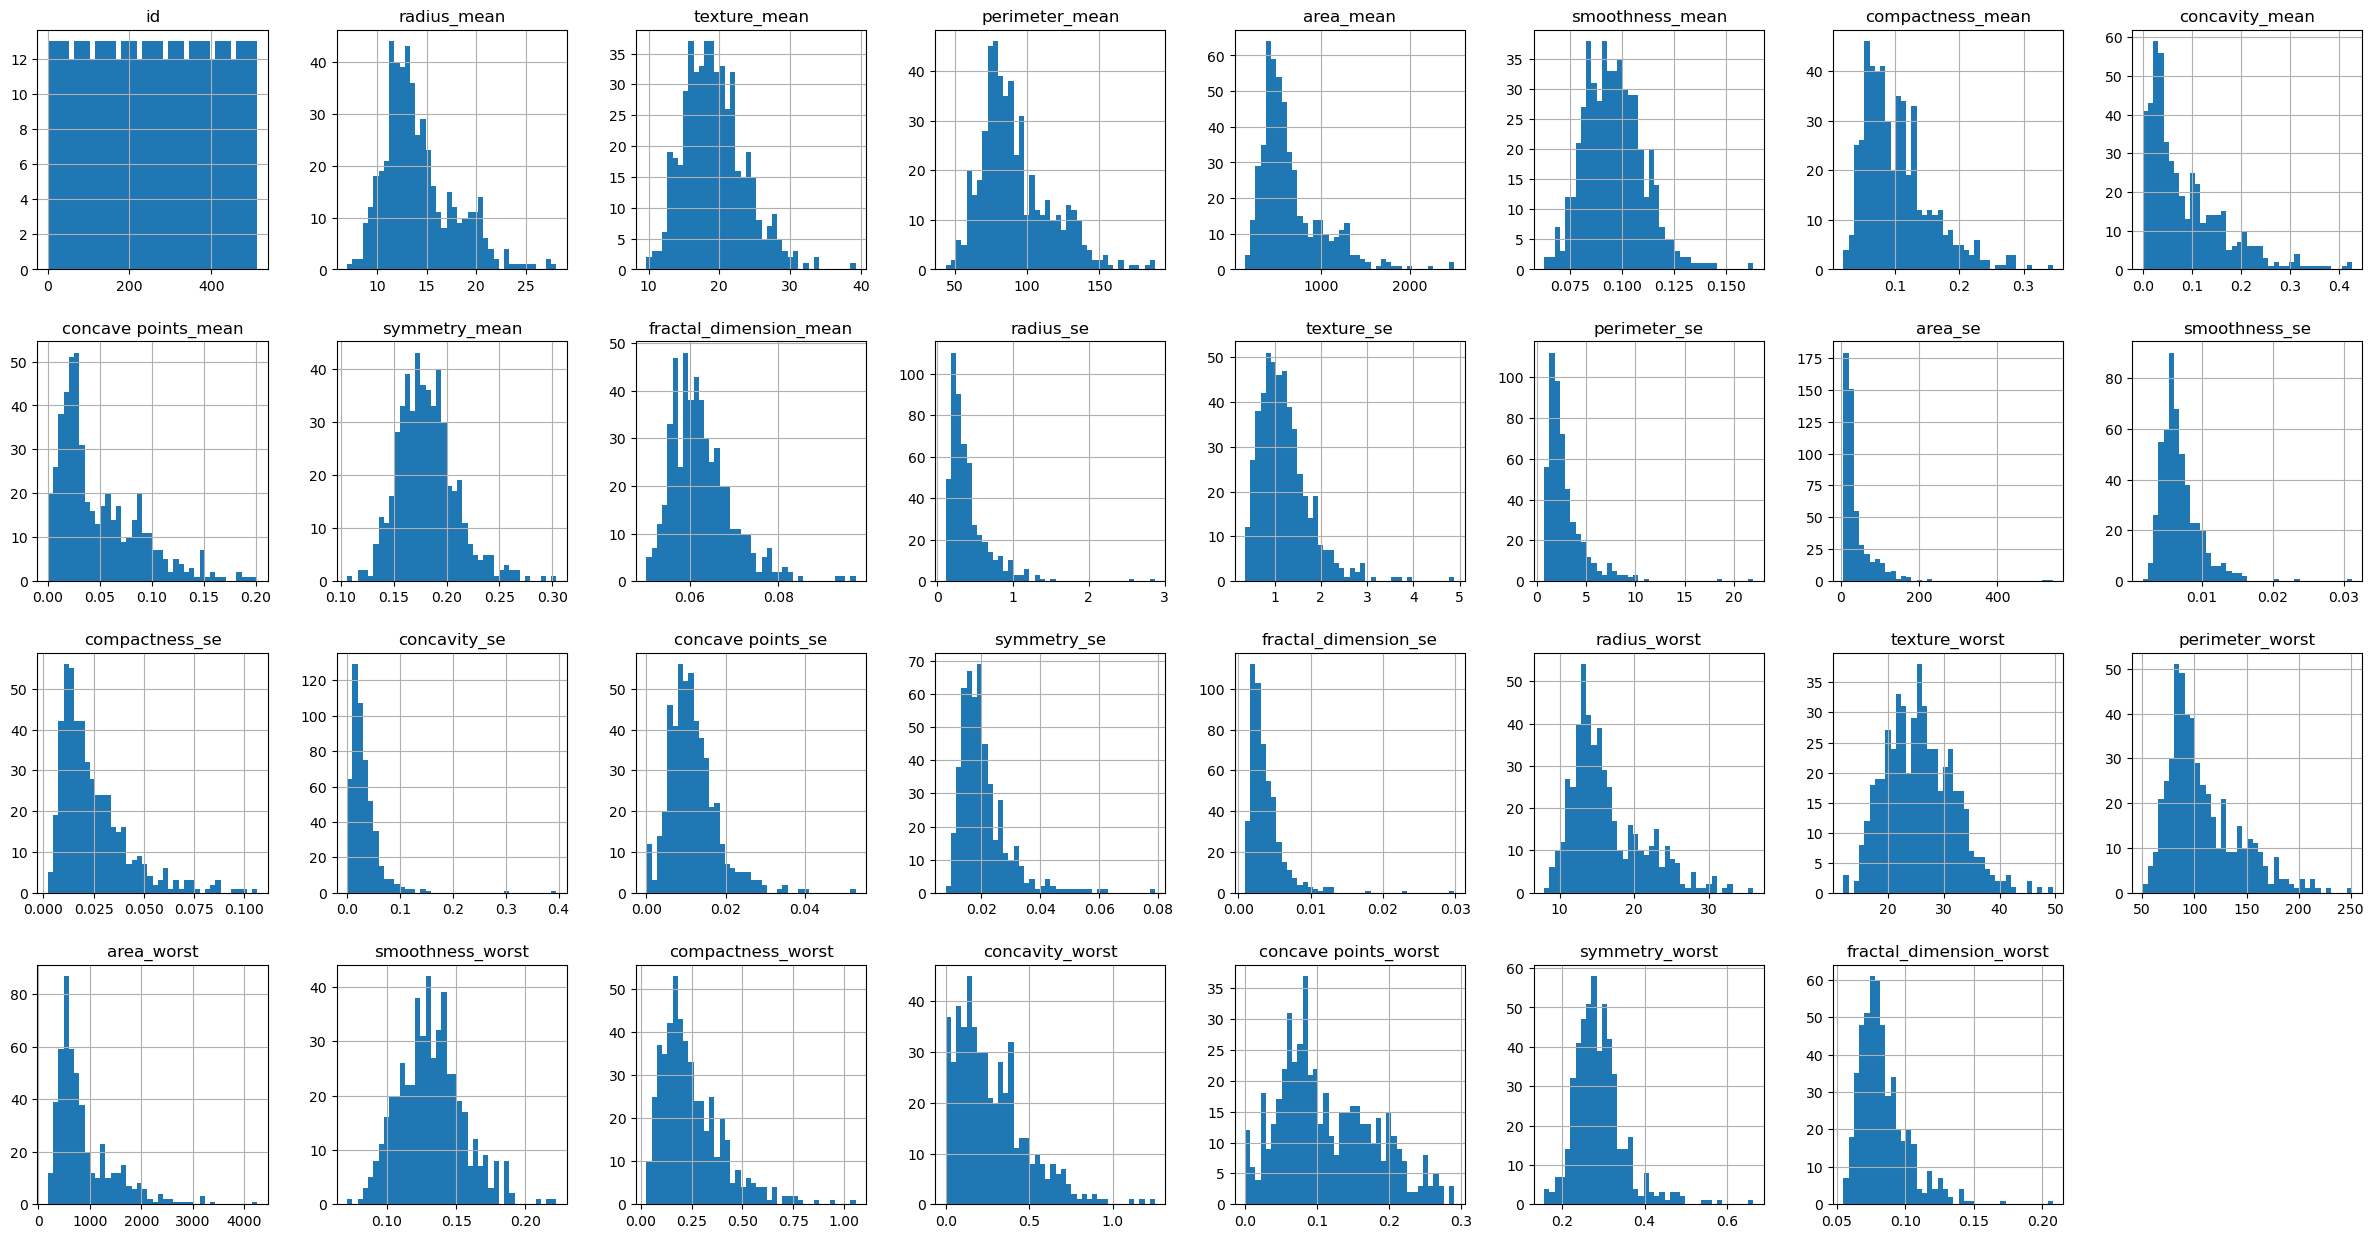

In [86]:
df.hist(bins=40, figsize=(30, 80), layout=(20, 8))

plt.show()

The histograms reveal that many of the features in the dataset are **right-skewed**, especially those related to area, perimeter, concavity, and concave points. This skewness suggests the presence of **extreme values or potential outliers**.

Due to the high variability and skewness, it is important to apply **feature scaling** (e.g., standardization or min-max scaling) before training machine learning models.

## Outliers

To improve visual comparability between features with vastly different scales, all numerical variables were standardized using `StandardScaler`. This transformation centers the data around a mean of 0 and scales it to unit variance. As a result, the boxplots will highlight potential outliers more clearly across all features.

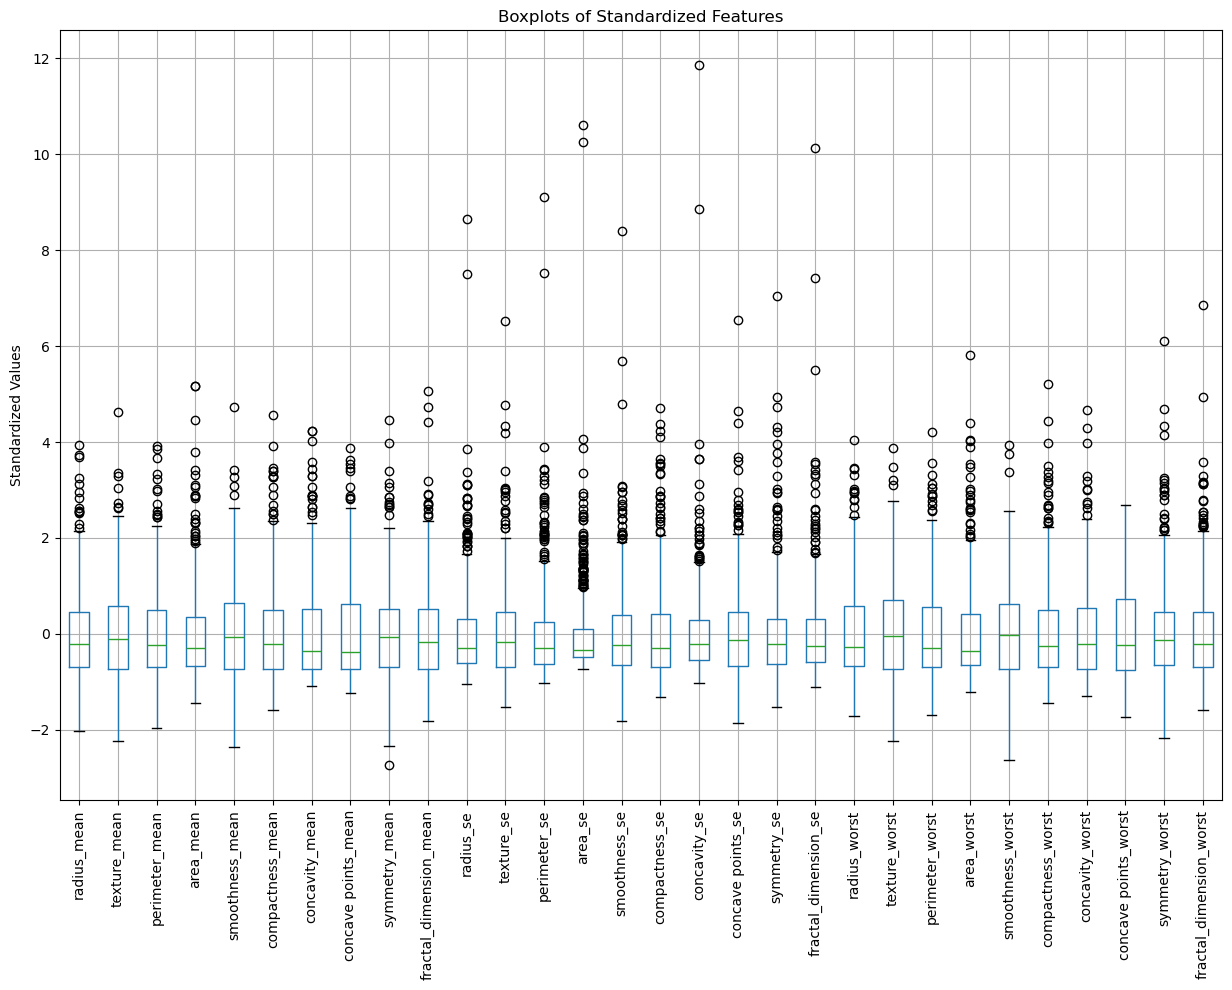

In [110]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features, excluding 'id'
features = df.select_dtypes(include='number').columns.drop('id')
X = df[features]

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame for plotting
scaled_df = pd.DataFrame(X_scaled, columns=features)

# Plot the standardized boxplots
plt.figure(figsize=(15, 10))
scaled_df.boxplot(rot=90)
plt.title("Boxplots of Standardized Features")
plt.ylabel("Standardized Values")
plt.show()

Values beyond ±3 standard deviations are strong candidates for outliers. Notably, features such as `perimeter_se`, `area_se`, and `concavity_se` show several extreme values.

## Correlation

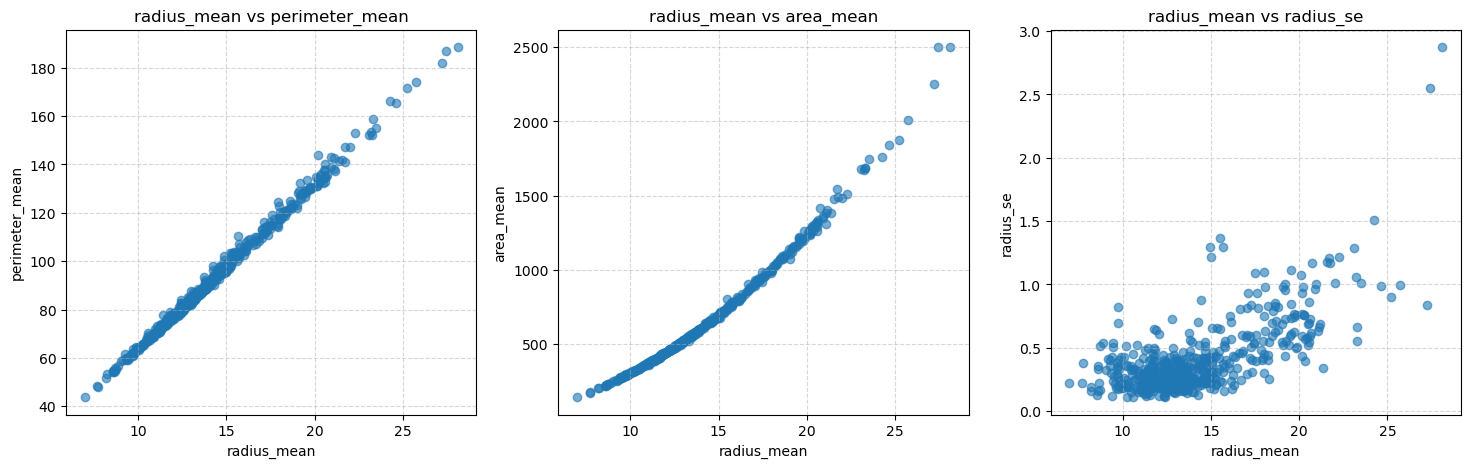

In [25]:
from scipy.stats import spearmanr, pearsonr


# Feature pairs to compare
feature_pairs = [
    ("radius_mean", "perimeter_mean"),
    ("radius_mean", "area_mean"),
    ("radius_mean", "radius_se"),
]

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through feature pairs and plot
for ax, (x_feature, y_feature) in zip(axes, feature_pairs):
    x = df[x_feature]
    y = df[y_feature]

    # Scatter plot
    ax.scatter(x, y, alpha=0.6)

    # Label and title
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_title(f"{x_feature} vs {y_feature}")
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

To assess which correlation method to use for measuring the association between features, scatter plots were examined for randomly selected feature pairs. While the pair `radius_mean` and `perimeter_mean` shows a clear linear relationship, others such as `radius_mean` vs `area_mean` and `radius_mean` vs `radius_se` reveal nonlinear or weak patterns. This confirms that not all relationships in the dataset are linear, suggesting that Pearson correlation may not fully capture the structure of the data. In such case, alternative measures like Spearman correlation may provide more reliable insights.

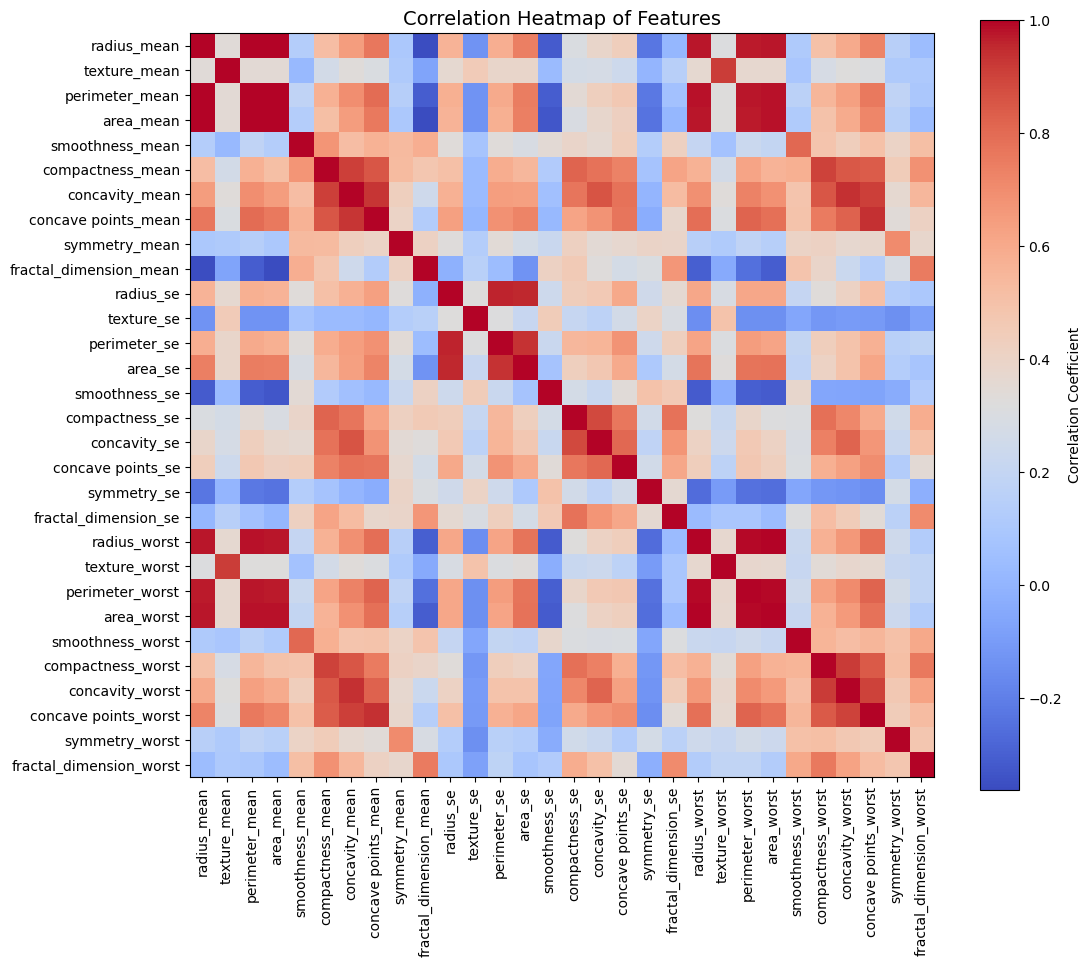

In [26]:
features_df = df.drop(columns=["id", "diagnosis"])  # keep only features

# Compute correlation matrix
corr_matrix = features_df.corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation='none')
plt.colorbar(label='Correlation Coefficient')

# Add axis labels
axis_indices = np.arange(len(corr_matrix.columns))
plt.xticks(axis_indices, corr_matrix.columns, rotation=90)
plt.yticks(axis_indices, corr_matrix.columns)

# Add title
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

Strong positive correlations (shown in dark red) and strong negative correlations (in dark blue) help identify redundancy in the data. For example, `radius_mean`, `perimeter_mean`, and `area_mean` are highly correlated, suggesting they may capture similar structural information about the tumor.

# Cleaning

In [95]:
df_final = df.copy()

## Encoding

In [96]:
df_final['diagnosis'] = df_final['diagnosis'].replace({'M': '1', 'B': '0'}).astype(int)
df_final.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
1,2,0,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,NaN
2,3,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
3,4,1,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314
4,5,0,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,...,13.74,19.93,88.81,585.4,0.1483,NaN,0.22410,0.10560,0.3380,0.09584


For encoding purposes we assign "B" as 0 and "M" as 1.

## Remove

In [97]:
df_final = df_final.drop('id', axis=1)
df_final.shape

(512, 31)

"id" does not influence diagnosis.

## Save

In [29]:
df_dev_final.to_csv('../data/breast_cancer.csv', index=False)  